<a href="https://colab.research.google.com/github/RitulMohan/TF.Autoencoder/blob/main/autoencodsers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing all the neeeded libraraies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
pip install keras 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [ ]:
latent_dim = 64 

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   


    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])


    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])


  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError(), metrics =['accuracy'])

In [ ]:
autoencoder.fit(x_train, x_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0234 - accuracy: 0.1161
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0115 - accuracy: 0.1738
Epoch 3/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0101 - accuracy: 0.1974
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0095 - accuracy: 0.2080
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0092 - accuracy: 0.2137
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0091 - accuracy: 0.2171
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0090 - accuracy: 0.2192
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0089 - accuracy: 0.2202
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0088 - accuracy: 0.2219
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.008

In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

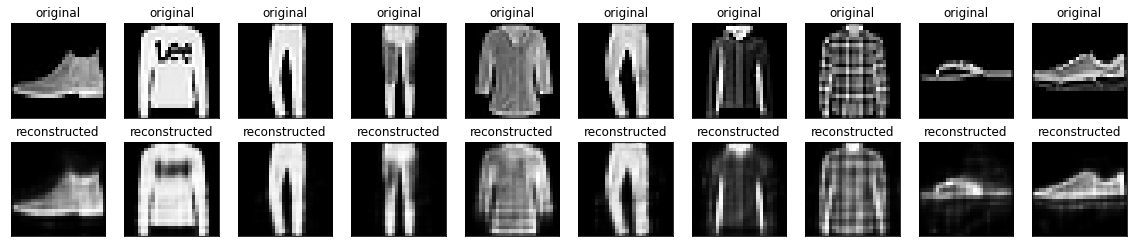

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()